In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("epl_event_data_15.csv")

In [3]:
data.columns

Index(['Unnamed: 0', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'duration', 'related_events', 'location',
       'under_pressure', 'counterpress', 'type.id', 'type.name',
       'possession_team.id', 'possession_team.name', 'play_pattern.id',
       'play_pattern.name', 'team.id', 'team.name', 'tactics.formation',
       'tactics.lineup', 'player.id', 'player.name', 'position.id',
       'position.name', 'pass.length', 'pass.angle', 'pass.height.id',
       'pass.height.name', 'pass.body_part.id', 'pass.body_part.name',
       'pass.type.id', 'pass.type.name', 'pass.outcome.id',
       'pass.outcome.name', 'pass.receipient.id', 'pass.recipient.name',
       'pass.end_location', 'dribble.outcome.id', 'dribble.outcome.name',
       'ball_receipt.outcome.id', 'ball_receipt.outcome.name',
       'carry.end_location', 'duel.outcome.id', 'duel.outcome.name',
       'competition_id', 'match_id'],
      dtype='object')

In [4]:
possession_length_count = data[["match_id","possession","player.id","id"]].groupby(["match_id","possession","player.id"],as_index=False).count()
np.mean(possession_length_count.id)

np.float64(2.7739902521720703)

In [5]:
sum(possession_length_count.id<10)

463171

In [6]:
print(sum(possession_length_count.id<4)/len(possession_length_count))

0.7892180546726001


C:\Users\conny\AppData\Local\Temp\ipykernel_18832\801728160.py:4: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.25`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(np.array(possession_length_count.id), bw=0.25)


<Axes: ylabel='Density'>

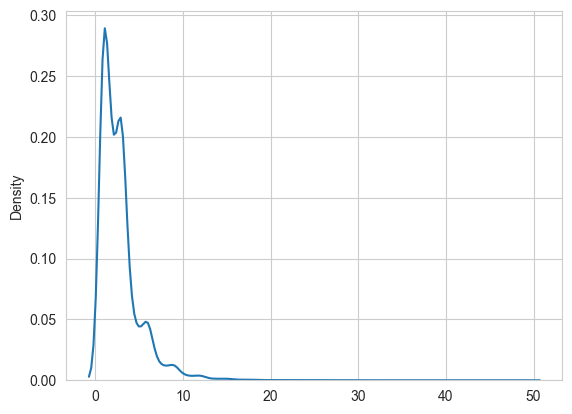

In [7]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(possession_length_count.id), bw=0.25)

C:\Users\conny\AppData\Local\Temp\ipykernel_18832\3324669436.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  hist.set_xticklabels(hist.get_xticklabels(), rotation=90)


[Text(0, 0, 'Starting XI'),
 Text(1, 0, 'Half Start'),
 Text(2, 0, 'Pass'),
 Text(3, 0, 'Ball Receipt*'),
 Text(4, 0, 'Carry'),
 Text(5, 0, 'Pressure'),
 Text(6, 0, 'Dispossessed'),
 Text(7, 0, 'Duel'),
 Text(8, 0, 'Shot'),
 Text(9, 0, 'Block'),
 Text(10, 0, 'Goal Keeper'),
 Text(11, 0, 'Ball Recovery'),
 Text(12, 0, 'Miscontrol'),
 Text(13, 0, 'Clearance'),
 Text(14, 0, 'Dribbled Past'),
 Text(15, 0, 'Dribble'),
 Text(16, 0, 'Interception'),
 Text(17, 0, 'Foul Committed'),
 Text(18, 0, 'Foul Won'),
 Text(19, 0, 'Half End'),
 Text(20, 0, 'Substitution'),
 Text(21, 0, 'Injury Stoppage'),
 Text(22, 0, 'Tactical Shift'),
 Text(23, 0, 'Shield'),
 Text(24, 0, '50/50'),
 Text(25, 0, 'Offside'),
 Text(26, 0, 'Error'),
 Text(27, 0, 'Bad Behaviour'),
 Text(28, 0, 'Referee Ball-Drop'),
 Text(29, 0, 'Own Goal Against'),
 Text(30, 0, 'Own Goal For'),
 Text(31, 0, 'Player Off'),
 Text(32, 0, 'Player On')]

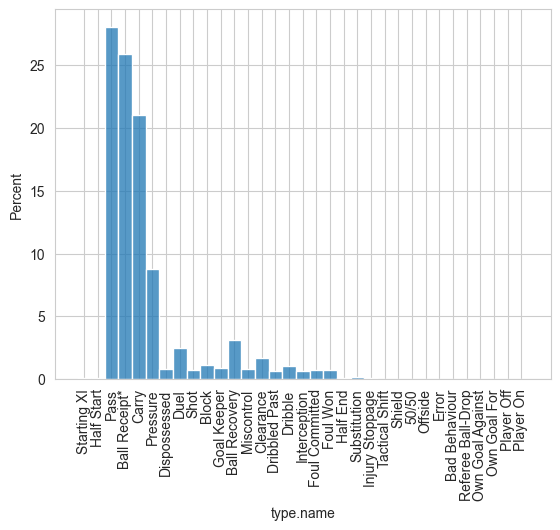

In [8]:
hist = sns.histplot(data=data, x="type.name", stat="percent")
hist.set_xticklabels(hist.get_xticklabels(), rotation=90)

use ball receipt, carry, pressure, due, miscontrol, dribble past, dribble as features

In [50]:
data.columns

Index(['Unnamed: 0', 'id', 'index', 'period', 'timestamp', 'minute', 'second',
       'possession', 'duration', 'related_events', 'location',
       'under_pressure', 'counterpress', 'type.id', 'type.name',
       'possession_team.id', 'possession_team.name', 'play_pattern.id',
       'play_pattern.name', 'team.id', 'team.name', 'tactics.formation',
       'tactics.lineup', 'player.id', 'player.name', 'position.id',
       'position.name', 'pass.length', 'pass.angle', 'pass.height.id',
       'pass.height.name', 'pass.body_part.id', 'pass.body_part.name',
       'pass.type.id', 'pass.type.name', 'pass.outcome.id',
       'pass.outcome.name', 'pass.receipient.id', 'pass.recipient.name',
       'pass.end_location', 'dribble.outcome.id', 'dribble.outcome.name',
       'ball_receipt.outcome.id', 'ball_receipt.outcome.name',
       'carry.end_location', 'duel.outcome.id', 'duel.outcome.name',
       'competition_id', 'match_id'],
      dtype='object')

In [48]:
data[["location","carry.end_location"]][data["type.name"]=="Carry"].head()

,location,carry.end_location
6,"60.4, 43.6","60.4, 43.6"
11,"37.5, 76.1","37.5, 74.6"
14,"27.4, 58.1","27.4, 63.9"
17,"35.1, 77.8","30.4, 78"
21,"16.7, 75.5","19.1, 69.7"


In [52]:
data["location"]

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4            61, 40.1
              ...    
1313778     75.5, 6.6
1313779     77.7, 5.6
1313780    77.7, 13.9
1313781           NaN
1313782           NaN
Name: location, Length: 1313783, dtype: object

In [54]:
def split_coords(coord):
    if isinstance(coord, str):
        return map(float, coord.split(','))
    elif isinstance(coord, (float, int)):
        return coord, np.nan  # Handle single numeric values
    else:
        return np.nan, np.nan

data[['loc_x', 'loc_y']] = data['location'].apply(
    lambda x: pd.Series(split_coords(x))
)
data[['end_x', 'end_y']] = data['carry.end_location'].apply(
    lambda x: pd.Series(split_coords(x))
)

# Calculate Euclidean distance
data['distance'] = np.sqrt(
    (data['end_x'] - data['loc_x'])**2 + 
    (data['end_y'] - data['loc_y'])**2
)

# Optional: Round to 2 decimal places
data['distance'] = data['distance'].round(2)

In [58]:
data.distance.min()

np.float64(0.0)

In [11]:
data.timestamp = pd.to_datetime(data.timestamp)

C:\Users\conny\AppData\Local\Temp\ipykernel_18832\1525310573.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data.timestamp = pd.to_datetime(data.timestamp)


In [39]:

main_df = pd.DataFrame(data)

# Sort - critical for logic (add 'index' to preserve original order if needed)
#main_df = main_df.sort_values(["match_id",'timestamp',"type.name"]).reset_index(drop=True)
main_df['sort_priority'] = main_df['type.name'].map({
    'Ball Receipt*': 0,
    "Ball Recovery":1,  # Highest priority (comes first)
    'Pass': 2
    # Add other types as needed
    
}).fillna(99)

# Sort with priority
main_df = main_df.sort_values(['match_id', 'timestamp', 'sort_priority'])
# Vectorized possession detection -------------------------------------------------

# 1. Mark all Ball Receipt events
main_df['is_br'] = ((main_df['type.name'] == 'Ball Receipt*')|(main_df['type.name'] == 'Ball Recovery')).astype(int)

# 2. Create possession groups using cumsum()
main_df['poss_group'] = main_df['is_br'].cumsum()

# 3. Forward-fill player.id within each possession group
main_df['possessing_player'] = (main_df['player.id']
                               .where(main_df['is_br'] == 1)
                               .groupby(main_df['poss_group'])
                               .ffill())

# 4. Detect possession endings (Pass or new Ball Receipt)
end_conditions = (
    ((main_df['type.name'] == 'Pass') & 
    (main_df['player.id'] == main_df['possessing_player'])) | \
    ((main_df['type.name'] == 'Ball Receipt*') & 
    (main_df['player.id'] != main_df['possessing_player']))    | \
    ((main_df['type.name'] == 'Ball Recovery') & 
    (main_df['player.id'] != main_df['possessing_player'])))

# 5. Create valid possession windows
main_df['valid_possession'] = (main_df['poss_group']
                              .isin(main_df.loc[end_conditions, 'poss_group'] - 1))

# 6. Final in_possession flag
#main_df['in_possession'] = np.where(
#    (main_df['possessing_player'].notna()) & 
#    ((main_df['valid_possession']) | 
#     (main_df['is_br'] == 1)),
#    1, 0
#)
main_df['in_possession'] = (
    (main_df['possessing_player'].notna())
    .astype(int)
)
# Cleanup ------------------------------------------------------------------------
main_df = main_df.drop(columns=['is_br', 'poss_group', 'valid_possession'])

# Result (showing key columns)
print(main_df[['timestamp','type.name','player.id','in_possession','possessing_player']])

                     timestamp    type.name  player.id  in_possession  \
88194  2025-04-17 00:00:00.000  Starting XI        NaN              0   
88195  2025-04-17 00:00:00.000  Starting XI        NaN              0   
88196  2025-04-17 00:00:00.000   Half Start        NaN              0   
88197  2025-04-17 00:00:00.000   Half Start        NaN              0   
89966  2025-04-17 00:00:00.000   Half Start        NaN              0   
...                        ...          ...        ...            ...   
556453 2025-04-17 00:48:55.036        Carry     7780.0              1   
556454 2025-04-17 00:48:56.196         Pass     7780.0              1   
556455 2025-04-17 00:48:57.675    Clearance     3407.0              1   
556456 2025-04-17 00:49:01.683     Half End        NaN              1   
556457 2025-04-17 00:49:01.683     Half End        NaN              1   

        possessing_player  
88194                 NaN  
88195                 NaN  
88196                 NaN  
88197      

In [41]:
change_mask = (
    (main_df['in_possession'].diff() != 0) | 
    (main_df['possessing_player'] != main_df['possessing_player'].shift())
)

 #Generate possession identifiers
main_df['poss_identifier'] = (
    change_mask.cumsum() * main_df['in_possession']
).astype(int)



In [45]:
main_df["possession_id"] = poss_identifier
main_df.tail(10)

,Unnamed: 0,id,index,period,timestamp,minute,second,possession,duration,related_events,...,carry.end_location,duel.outcome.id,duel.outcome.name,competition_id,match_id,sort_priority,possessing_player,in_possession,poss_identifier,possession_id
556448,556449,6234511b-f977-47fe-a46e-5462ceb6165a,3134,2,2025-04-17 00:48:51.331,93,51,184,1.887346,32e39785-016c-4d67-92f3-0162f6ea2762,...,NaN,NaN,NaN,2,3754351,2.0,7780.0,1,371897,371891
556449,556450,32e39785-016c-4d67-92f3-0162f6ea2762,3135,2,2025-04-17 00:48:53.218,93,53,184,NaN,6234511b-f977-47fe-a46e-5462ceb6165a,...,NaN,NaN,NaN,2,3754351,0.0,3515.0,1,371898,371892
556450,556451,11784ff8-1297-4bec-9cd8-2910074aae0b,3136,2,2025-04-17 00:48:53.218,93,53,184,0.757665,"32e39785-016c-4d67-92f3-0162f6ea2762, c37cd068...",...,"82.8, 14.5",NaN,NaN,2,3754351,99.0,3515.0,1,371898,371892
556451,556452,c37cd068-cd4a-4596-ba45-083778290ce4,3137,2,2025-04-17 00:48:53.976,93,53,184,1.060871,b1d018cc-f563-49c7-83e2-221255849e5e,...,NaN,NaN,NaN,2,3754351,2.0,3515.0,1,371898,371892
556452,556453,b1d018cc-f563-49c7-83e2-221255849e5e,3138,2,2025-04-17 00:48:55.036,93,55,184,NaN,c37cd068-cd4a-4596-ba45-083778290ce4,...,NaN,NaN,NaN,2,3754351,0.0,7780.0,1,371899,371893
556453,556454,c7738969-f2cd-4c5a-a4b5-65c04b48a0c1,3139,2,2025-04-17 00:48:55.036,93,55,184,1.159927,"19f1c1f4-a281-4943-8de4-416a5c63e6dd, b1d018cc...",...,"75.6, 31.4",NaN,NaN,2,3754351,99.0,7780.0,1,371899,371893
556454,556455,19f1c1f4-a281-4943-8de4-416a5c63e6dd,3140,2,2025-04-17 00:48:56.196,93,56,184,1.478724,325fe8e3-81a4-4876-ae82-3d76903967f6,...,NaN,NaN,NaN,2,3754351,2.0,7780.0,1,371899,371893
556455,556456,325fe8e3-81a4-4876-ae82-3d76903967f6,3141,2,2025-04-17 00:48:57.675,93,57,184,0.000000,19f1c1f4-a281-4943-8de4-416a5c63e6dd,...,NaN,NaN,NaN,2,3754351,99.0,7780.0,1,371899,371893
556456,556457,4265711a-a4d3-4e73-aa6c-d506ccee722f,3142,2,2025-04-17 00:49:01.683,94,1,184,0.000000,dd50f887-7e7f-4161-a04f-da24bd99f24a,...,NaN,NaN,NaN,2,3754351,99.0,7780.0,1,371899,371893
556457,556458,dd50f887-7e7f-4161-a04f-da24bd99f24a,3143,2,2025-04-17 00:49:01.683,94,1,184,0.000000,4265711a-a4d3-4e73-aa6c-d506ccee722f,...,NaN,NaN,NaN,2,3754351,99.0,7780.0,1,371899,371893


tensor containing pressure, distance, duration, dribble, dribble past

In [60]:
data["dribble.outcome.name"].unique()

array([nan, 'Complete', 'Incomplete'], dtype=object)

In [61]:
main_df["possession_id"][main_df["type.name"]=="Foul Won"]

90235        147
90249        156
88435        160
90262        164
90269        165
           ...  
555968    371637
556312    371824
556404    371862
556412    371868
556415    371871
Name: possession_id, Length: 9112, dtype: int64